3000 ORD MAX 
# The whole process

## Preprocess
In the beginning we decided the features we wanted to use amd therefore we decided to remove some of the colums because they were not necesarry for our predictions. The more data the longer time it takes to process and the data may become more inaccurate. We decided to drop NaN values as well.


### Why are we dropping 

It's worth noting that dropping rows with NaN values might lead to a loss of data. We have consider other methods, such as filling NaNs with mean, median, or a specific value, depending on the nature of the data. But we chose to remove them. 

The code drops columns using irrelevante_col to streamline the dataset for analysis. Columns are removed if they are irrelevant, have many missing values, contain redundant information, or exhibit inconsistencies. The decision is tailored to the analysis goals, aiming for a cleaner dataset that meets specific requirements and enhances overall data quality. As well as more uncessasary data can cause inaccurate results and a longer runtime. 

### Visulization of NaN values 

We are cleaning and preparing the data for it to be used. Here is a visulasation of a bar chart that visually represents the impact of dropping rows with missing values (NaN) in our DataFrame. 
We see that the count of missing values significantly decreases after dropping rows, it indicates that this operation is effective in reducing missing data. If there was not a masjor change it can be considered effective in maintaining data integrity. But as we can see it was amsrat move. 
Dropping rows can also be computationally efficient, especially our dataset is large and the proportion of rows with missing values is relatively small. So even of there was a lot of data that is not used now it is a small amount compared to the whole dataset. 
Of couse dropping values and its outcome depends on the dataset but considering this exaple we thought the smartest move was to remove to remove the values. 

The significant reduction in missing values post-removal indicates the effectiveness of this operation with minimal impact on data integrity.
The computational efficiency of dropping rows is highlighted, especially for large datasets, where the loss is negligible compared to the dataset's overall size.

### Fish types and why we chose the fish we did 
Concentrating on the "Art FAO" column, we excluded other species, prioritizing the analysis of predominant fish types for accuracy.
Here you can see a visulasation of the different fish types. As you can see there is a significant difference between the fishes. To get the best accuracy and values we chose to focus on the fish with the most data. 
Making a barchart of all fish to visualize

### Why are we doing it?  

## KNN
When we used KNN we decided to normalize, it can be smart to normalize the featurtes because then no feature is very different from one another 
We are leverling out the feild for all features so the KNN works better and make even more accurate predictions  

#### Confusion matrix in KNN 
The diagonal elements of the confusion matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.   
A good model is one which has high correct predictions while few false predictions . The Blue ones that goes diagnonal are the correct predictions. As you can see there are a significant higher number of true predicttions. We have decided to predict this amount of different fish because we wantted the predictions to be fairly correct. 

You can see the numbers within the 300-400 value range. We have concluded that these might be difficult to differenciate because these species are different types of cod. And therefore might be more difficult to differenciate. Some of the squares that are similar in numbers that are not diagnonal are similar because sei and hyse is a type of torsk. And therefore you can seee it is more difficult to predict.
##### Taking a look at the data 
 And continuing. 
The training score is a little higher then validation, wich indicates a little overfitting.

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      5103
           1       0.87      0.87      0.87      3693
           2       0.99      0.99      0.99      2674
           3       0.69      0.68      0.68      1497
           4       0.92      0.88      0.90       494

    accuracy                           0.86     13461
   macro avg       0.86      0.85      0.86     13461
weighted avg       0.86      0.86      0.86     13461


## Ny Supervised Logistic regression (etter endringer?)

1. **Best Hyperparameters**:
   - The best parameters found (`{'model__C': 1, 'model__solver': 'saga'}`) suggest that a regularization strength of 1 with the 'saga' solver works best given the current model setup and data. This choice seems appropriate, especially since 'saga' is efficient for larger datasets and supports multinomial loss for logistic regression.

2. **Model Performance Metrics**:
   - **Validation Accuracy (65.14%)** and **Test Accuracy (56.15%)** show a noticeable difference. This drop between validation and test accuracy could indicate overfitting during model training or a difference in the data distribution between the validation and test sets.

   - **Precision (69.07%)** and **Recall (64.56%)** are moderate but not exceptionally high. The disparity between these metrics and the accuracy could reflect the class imbalance and the model's varying effectiveness in correctly identifying classes.

   - The **F1 Score (60.70%)** is relatively low compared to precision and recall, suggesting a balance between precision and recall has not been optimally achieved. This could be due to the model not performing well on minority classes or having significant false positives and false negatives.

   - The **ROC-AUC (50.58%)** is particularly low and is a critical concern. A ROC-AUC close to 50% suggests that the model performs no better than random guessing for some classes, indicating poor discriminative ability especially in distinguishing between classes.
   - The **Weighted ROC-AUC** score is significantly higher at **0.833** compared to the unweighted **ROC-AUC** of 0.506. 
   This indicates: 

   **Better Performance** on Major Classes: The high **weighted ROC-AUC** suggests that the model performs well in distinguishing the more prevalent classes from the rest. This is good in scenarios where the major classes carry more importance or are more impactful in practical applications. 

   **Poor Performance on Minor Classes:** The low unweighted ROC-AUC hints that the model struggles with one or more of the less frequent classes, which might not significantly impact the **weighted ROC-AUC** due to their smaller size.

3. **Class-Specific Performance**:
   - The confusion matrix's detailed breakdown by class shows that some classes (like class 2 and class 4) have much higher recall than others. For instance, class 4 has a high recall (0.86) and F1-score (0.55) which is impressive for a minority class but this is accompanied by low precision, indicating a high number of false positives.
   - Class 0 and class 1, which might be the majority classes, have higher precision but much lower recall, suggesting that while the model is confident about its predictions for these classes, it often misses them (false negatives).

   - The overall performance metrics aggregated over all classes do not provide a very accurate picture because of these discrepancies in performance across different classes.

## Supervised Logistic regression 

Pipeline: Streamlines preprocessing and modeling steps, ensuring that transformations are applied consistently during both training and evaluation.
GridSearchCV: Automates the process of hyperparameter tuning and selects the best model configuration based on cross-validation performance. It also ensures your model is not just tuned to a specific subset of your data.
Normalization included in Pipeline: Ensures that feature scaling (standardization) is properly integrated into the model training process, avoiding data leakage and ensuring that the same scaling is applied to both training and test data.


#### Best Parameters Found

- **`{'model__C': 10, 'model__solver': 'saga'}`**

This line tells us the best combination of hyperparameters found via grid search cross-validation. The hyperparameter `C` is the inverse of regularization strength; smaller values specify stronger regularization. A `C` value of 10 indicates that a relatively lower amount of regularization was found to be optimal for the model, suggesting that your model benefits from allowing more flexibility without overfitting. The `solver` parameter indicates the algorithm to use in the optimization problem. For logistic regression, `saga` is an algorithm suitable for large datasets and supports L1 regularization, indicating it was the best choice for the data.

#### Best Validation Accuracy

- **0.6429509298901981**

This number represents the highest accuracy achieved on the validation set during the model's training phase, using the best parameters found (`C=10` and `solver='saga'`). This accuracy value is a measure of how well the logistic regression model is at correctly predicting outcomes for data it hasn't been trained on, based on the split of data you provided for training and validation. An accuracy around 64.3% suggests that the model is significantly better than random guessing (which would be 50% in a binary classification task).

#### Accuracy on Test Set

- **0.6475001857217146**

This is the accuracy of the model on the test set, which is data that was not seen by the model during training (including validation). This metric is crucial because it gives us an idea of how your model will perform on entirely new, unseen data. An accuracy of approximately 64.75% is consistent with the validation accuracy, suggesting that the model has generalized relatively well from the training/validation sets to the test set. This consistency is a good sign, indicating that your model hasn't overfitted to the training data and is capable of making predictions at a similar level of accuracy on unseen data.

#### Precision, Recall, and F1 Score:

Precision of **0.694** indicates that when the model predicts a class, it is correct approximately 69.4% of the time.
Recall of 0.646 suggests that the model correctly identifies 64.6% of all relevant instances.

F1 Score of 0.606, the harmonic mean of precision and recall, indicates a balance between them but also highlights a potential area for improvement. This balance is crucial in scenarios where both false positives and false negatives carry significant costs.

ROC-AUC: A ROC-AUC score of 0.498 is very close to 0.5, which is the score expected from a model making predictions at random. This suggests the model is not effectively distinguishing between the classes for this specific task. A ROC-AUC score significantly higher than 0.5 is desirable as it indicates a good separation of classes by the model.

Accuracy on Test Set: With an accuracy of 0.648 on the test set, the model's performance is consistent with the validation accuracy, suggesting that the model generalizes well to unseen data. However, considering the ROC-AUC score, this accuracy might not fully capture the model's predictive performance across different thresholds or the balance between sensitivity and specificity.


## DL
In our DL model we have used to_categorical to convert categorical data (like class labels) into a numerical format that can be used as input to a neural network model. The function is necessary when working with classification tasks, as most machine learning algorithms require numerical inputs. It helps in improving the performance of the model by representing categorical data in a suitable format for computation. 

The Epochs represents the number of times the entire dataset has been passed forward and backward through the neural network during training.
Loss is a measure of how well the model is performing.The loss decreases over epochs, indicating that the model is improving. Higher accuracy values indicate better performance. Similar to loss, both training accuracy and validation accuracy are reported during training. The accuracy increases over epochs, indicating that the model is learning and making more accurate predictions.
The validation loss and accuracy metrics give insights into how well the model is generalizing to new, unseen data.

After training is complete, the model is evaluated on a separate test dataset to assess its performance on completely unseen data. The reported test accuracy tells us how well the model is expected to perform in the real world.

The output tells us how the model's loss and accuracy change over training epochs, as well as how well it performs on both the validation and test datasets. Overall, the decreasing loss and increasing accuracy suggest that the model is learning and improving its performance as it trains.

## Clustering 
With using clustering we want to check if the different types of fish is living in different places using the cordinates, and if this is one of the huge impacts on the other ML models we are using. 

Conlcusion:
Freindly reminder that 'Torsk':  0, 'Sei':  1, 'Dypvannsreke': 2, 'Hyse': 3, 'Lange': 4

Because the grupping of the clusters are "randomly" group by the cordinates, we expect to see some outliers in the cluster, but it helps us get a clearer look at where approximately the fish gets fished.

As anticipated, we observe a clear correlation among fish species such as "torsk," "sei," and "hyse," all belonging to the cod family, primarily being caught in locations 1 and 2. An exception to this pattern is "sei," which is also occasionally caught in location 0. Conversely, fish species not in the cod family, like "Dyppvannsreke," tend to be caught predominantly in clusters 3 and 0. Additionally, "Lange" is primarily caught in cluster 0. This observation suggests that similar fish species is a greater challenge for classification compared to dissimilar ones. As we can cleary see in the confussion matrix of the KNN model.

## Comparison
#### KNN
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      5103
           1       0.87      0.87      0.87      3693
           2       0.99      0.99      0.99      2674
           3       0.69      0.68      0.68      1497
           4       0.92      0.88      0.90       494

    accuracy                           0.86     13461
   macro avg       0.86      0.85      0.86     13461
weighted avg       0.86      0.86      0.86     13461

#### Supervised Logistic regression 
 precision    recall  f1-score   support

           0       0.59      0.81      0.68      5103
           1       0.71      0.59      0.65      3693
           2       0.72      0.81      0.76      2674
           3       1.00      0.00      0.00      1497
           4       0.57      0.48      0.52       494

    accuracy                           0.65     13461
   macro avg       0.72      0.54      0.52     13461
weighted avg       0.69      0.65      0.61     13461



Comparing Logistic Regression and KNN you can see that the results and the predictions for KNN are much higher. This is likely because KNN is better at handelig imbalanced features. KNN makes predictions based on the similarity of instances in the feature space, which can be advantageous in capturing complex patterns in the data.
In contrast, Logistic Regression may struggle with imbalanced classes or non-linear relationships between features and the target variable, leading to lower precision and recall.
 If you take a look at out grapth og fish you can see that this is the case. There is a significant decrease in the 0-4 types. 


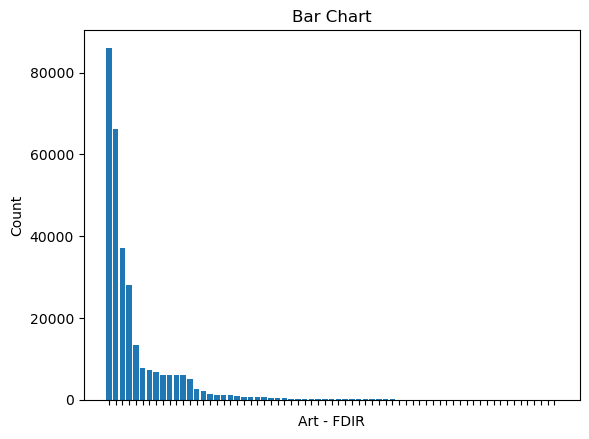

As you also have noticed the accuracy significantly higher in KNN. This obvisely suggest that KNN ie better at corretly classfiy instances in the datasat given. This is likely due to its ability to capture complex relationships and handle imbalanced class distributions effectively.

KNN doesn't assume a specific functional form for the decision boundary between classes. Instead, it makes predictions based on the majority class among its nearest neighbors. Therefore it can capture non-linear relationships and adapt to complex data distributions.
Logistic Regression, on the other hand, assumes a linear relationship between features and the log-odds of the target variable.
If the decision boundary between classes is non-linear, Logistic Regression may struggle to accurately classify instances, leading to lower performance metrics. Witch might be the cause in our case. 

KNN's nearest neighbor approach allows it to effectively capture instances of minority classes if they are well-represented within their local neighborhoods. Logistic Regression on the other hand may struggle with imbalanced classes, especially if the decision boundary is non-linear, leading to lower precision and recall for minority classes.

The results suggest that KNN outperforms Logistic Regression in this scenario, achieving higher precision, recall, F1-scores, and accuracy.
KNN's ability to capture complex relationships, handle imbalanced classes, and adapt to non-linear decision boundaries likely contributes to its superior performance in this case.


#### DL 
Epoch 1/10
1683/1683 [==============================] - 15s 8ms/step - loss: 0.5455 - accuracy: 0.7820 - val_loss: 0.4324 - val_accuracy: 0.8260
Epoch 2/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.4294 - accuracy: 0.8245 - val_loss: 0.3748 - val_accuracy: 0.8460
Epoch 3/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3970 - accuracy: 0.8376 - val_loss: 0.3654 - val_accuracy: 0.8528
Epoch 4/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3809 - accuracy: 0.8437 - val_loss: 0.3544 - val_accuracy: 0.8566
Epoch 5/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3685 - accuracy: 0.8499 - val_loss: 0.3499 - val_accuracy: 0.8539
Epoch 6/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3583 - accuracy: 0.8520 - val_loss: 0.3358 - val_accuracy: 0.8642
Epoch 7/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3491 - accuracy: 0.8565 - val_loss: 0.3315 - val_accuracy: 0.8603
Epoch 8/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3457 - accuracy: 0.8587 - val_loss: 0.3347 - val_accuracy: 0.8645
Epoch 9/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3414 - accuracy: 0.8604 - val_loss: 0.3282 - val_accuracy: 0.8659
Epoch 10/10
1683/1683 [==============================] - 13s 8ms/step - loss: 0.3366 - accuracy: 0.8618 - val_loss: 0.3234 - val_accuracy: 0.8721

421/421 - 2s - loss: 0.3234 - accuracy: 0.8721 - 2s/epoch - 4ms/step
Test accuracy: 0.8720749020576477

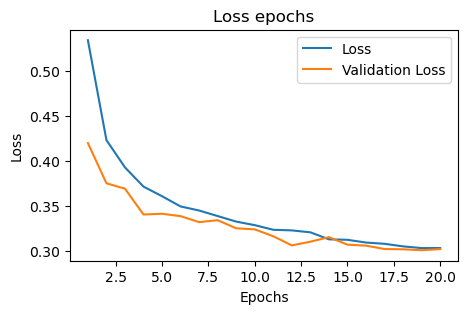
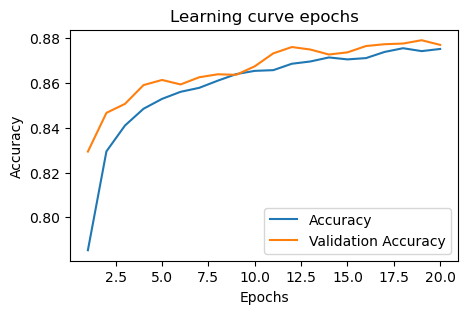

During the running of the code we can see that the code improved significantly. The code is good at generalizing the data given. We can see that it is improving, but for us to know for sure if it is improving contiunusely we could give it more epochs. Although it was considered uneccasary because we dont want it to be overfitted. Therefore we foud it most effective to be 10 epochs. 


## Final Thoughts and Discussing the Consequences

Throughout this group project, we have applied our knowledge and delved into the use of machine learning with our fisheries dataset. We have employed a variety of approaches, each offering unique insights and reflecting different facets of the underlying data.

During our process, we continuously experimented with different methods, experiencing both successes and failures. Below, we outline some of these processes and the consequences of our actions.

We have discovered that employing the data in various ways can lead to different outcomes. As noted, this project has extensively explored the application of machine learning to analyze fisheries data, utilizing diverse methodologies to enhance predictive capabilities and understand marine population dynamics. Each phase, from data preprocessing to model deployment, had its implications and consequences, which we discuss in the following sections.

### Key Findings and Methodological Insights:
**Processing the data :**
Our decision to selectively drop columns and handle NaN values by elimination was nacaserry for both accuracy, size and time. It made the analytical process and enhanced the accuracy and efficiency of the following models. This choice, though involving some loss of data, was justified by the sigificant reduction in missing values and minimal impact on data integrity, as evidenced by our visual analysis. 
Selectively choosing which features to include based on our initial assumptions may introduce bias. This choice could affect the models' accuracy, especially if omitted features hold predictive power or contain hidden patterns relevant to the fisheries' ecological dynamics. 
But dropping columns and rows containing NaN values steamlined the dataset and reduced processing time, leading to gains in model performance. However, this approach potentially discarded valuable information that could contribute to understanding fish population dynamics. The loss of this data might limit the model's ability to generalize to new, unseen scenarios where such information could be crucial. Overall our group concluded that the gain would be increase the efficianty and overruled the downsides. 

**Performance:**
  

   - The **K-Nearest Neighbors (KNN)** model exhibited superior performance across various metrics, including precision, recall, and F1-score. This suggests that KNN's non-parametric nature and its ability to capture complex, non-linear relationships between features made it particularly effective for our dataset, which features imbalanced classes and intricate patterns.
The high performance of the KNN model in handling non-linear relationships and class imbalances reflects its robustness in ecological data analysis. However, KNN's reliance on a large amount of data for making predictions can be computationally intensive, and might not scale well with even larger datasets or in real-time applications.

   - **Logistic Regression**, while generally robust, struggled in this context due to the non-linear decision boundaries and class imbalances, suggesting limitations in applying linear models to complex ecological data. The hyperparameter tuning highlighted an optimal less-regulated model, yet the overall effectiveness was moderate, indicating potential limitations of linear models for such complex datasets. This might lead to less reliable predictions in scenarios where the relationship between features and classes is not straightforward.

   - Our **Deep Learning** model demonstrated impressive learning capabilities, as shown by the consistent improvement in loss and accuracy across epochs. This approach proved particularly adept at generalizing from training to unseen test data, achieving the highest accuracy of 87.21%.
While the Deep Learning model showed excellent performance and adaptability, there is a risk of overfitting with more extensive training. Overfitting would make the model less effective in real-world applications, where new data might not follow the same patterns as the training set.


 **Clustering Analysis:**
   - The clustering helped us see pattarns in where different fish are found. This might explain why some of the models workex better for some species than others. This part of the study showed the importance abour area and where the fish live. It also showed the imporance of showing natural facors when we use models t predict things about them. 
Clustering provided insights into how different fish species distribute spatially, which is crucial for ecological conservation efforts. Understanding these patterns helps predict changes in fish populations due to environmental impacts such as climate change, overfishing, or habitat destruction.

Overall the project improved our ability to predict and understand marine populations, supporting more informed and strategic conservation and management decisions.
This project has demonstrated the potential of machine learning to transform data into actionable insights, which can significantly impact sustainable fisheries management and conservation strategies. While the chosen methodologies have shown promising results, continuous refinement and consideration of the ecological context are necessary to ensure these models remain effective and relevant in a rapidly changing world.

